**Task1**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.linear_model import Ridge, Lasso


In [3]:
df=pd.read_csv('/content/ToyotaCorolla - MLR.csv')
df.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [4]:
df.columns

Index(['Price', 'Age_08_04', 'KM', 'Fuel_Type', 'HP', 'Automatic', 'cc',
       'Doors', 'Cylinders', 'Gears', 'Weight'],
      dtype='object')

In [5]:
df.dtypes

,0
Price,int64
Age_08_04,int64
KM,int64
Fuel_Type,object
HP,int64
Automatic,int64
cc,int64
Doors,int64
Cylinders,int64
Gears,int64


In [6]:
df.columns

Index(['Price', 'Age_08_04', 'KM', 'Fuel_Type', 'HP', 'Automatic', 'cc',
       'Doors', 'Cylinders', 'Gears', 'Weight'],
      dtype='object')

In [7]:
df.shape

(1436, 11)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [9]:
df.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


In [10]:
df.isnull().sum()

,0
Price,0
Age_08_04,0
KM,0
Fuel_Type,0
HP,0
Automatic,0
cc,0
Doors,0
Cylinders,0
Gears,0


In [11]:
df.duplicated().sum()

np.int64(1)

In [12]:
df.drop_duplicates(inplace=True)

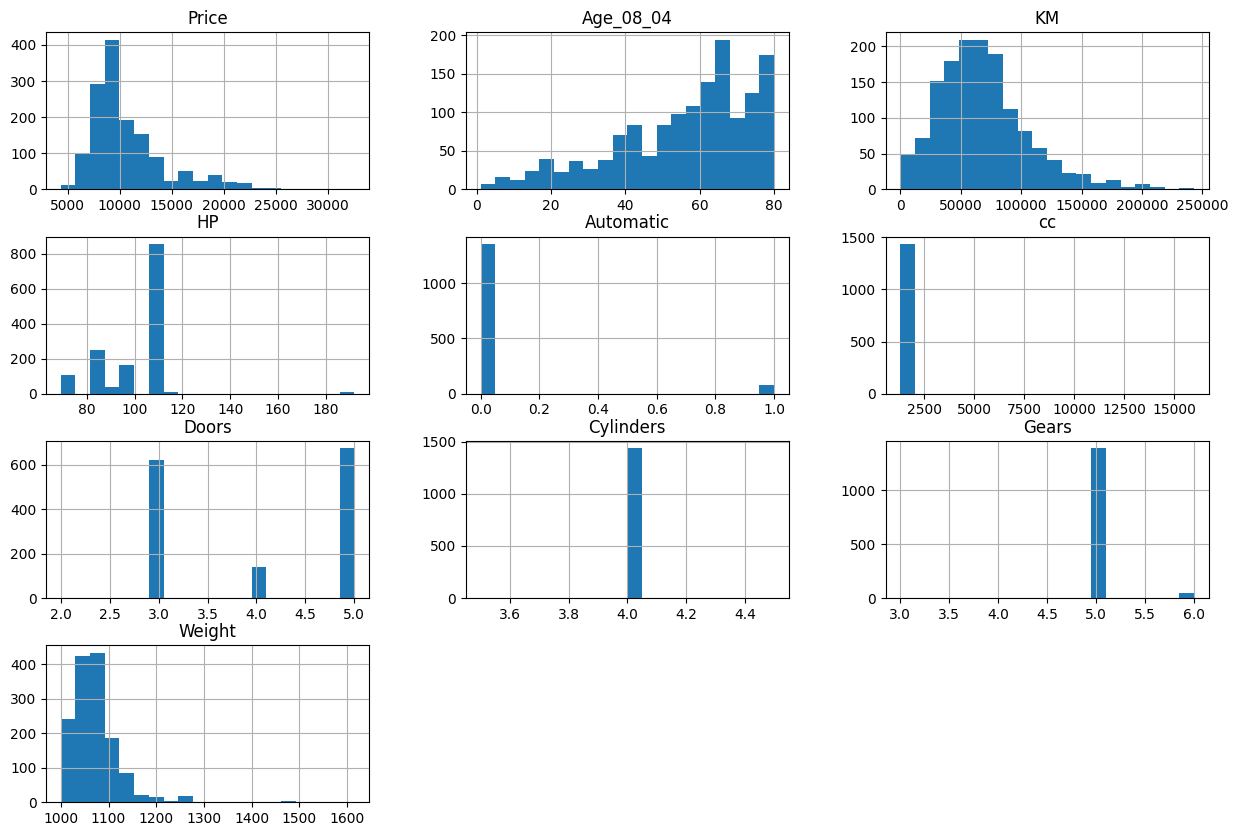

In [13]:
df.hist(bins=20, figsize=(15,10))
plt.title('Histogram of Numerical Features')
plt.show()

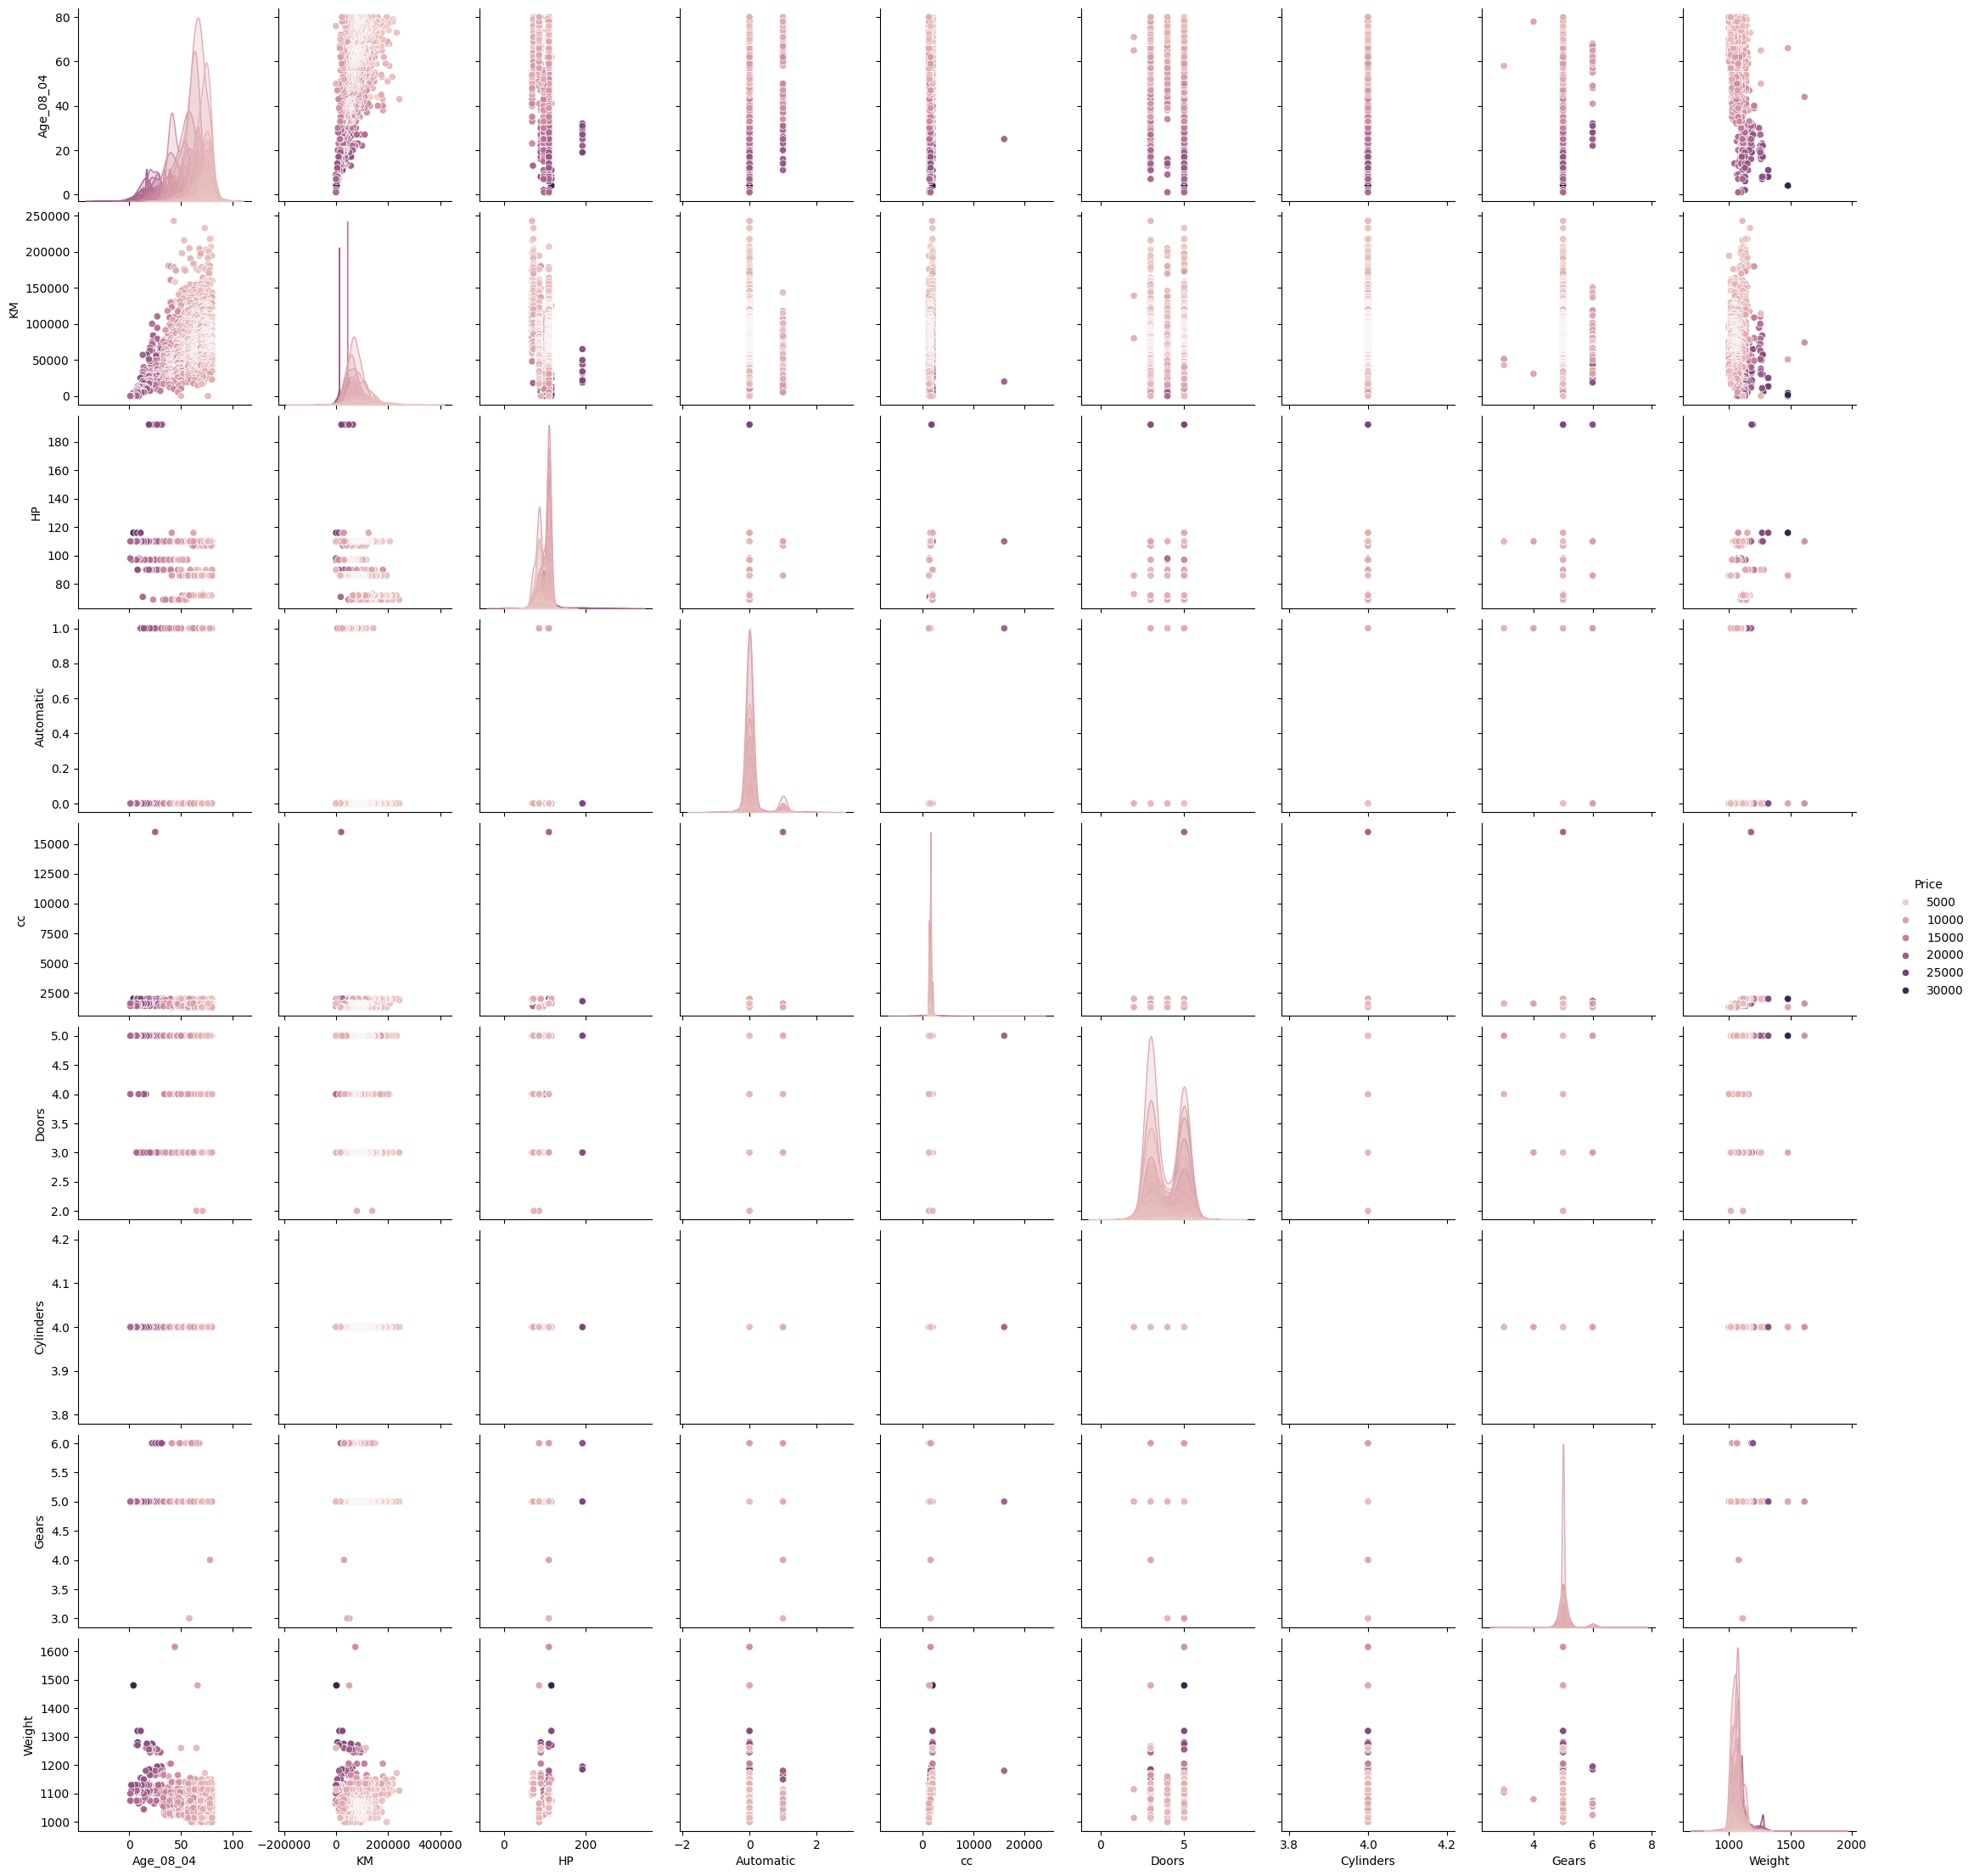

In [14]:
sns.pairplot(df, hue='Price')
plt.show()

In [15]:
df = pd.get_dummies(df, columns=['Fuel_Type'], drop_first=True)

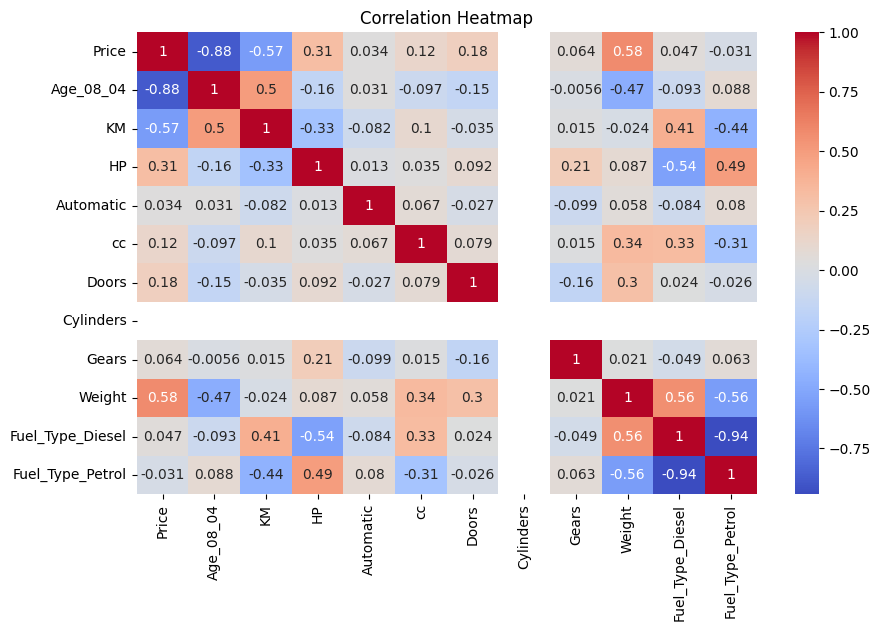

In [16]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

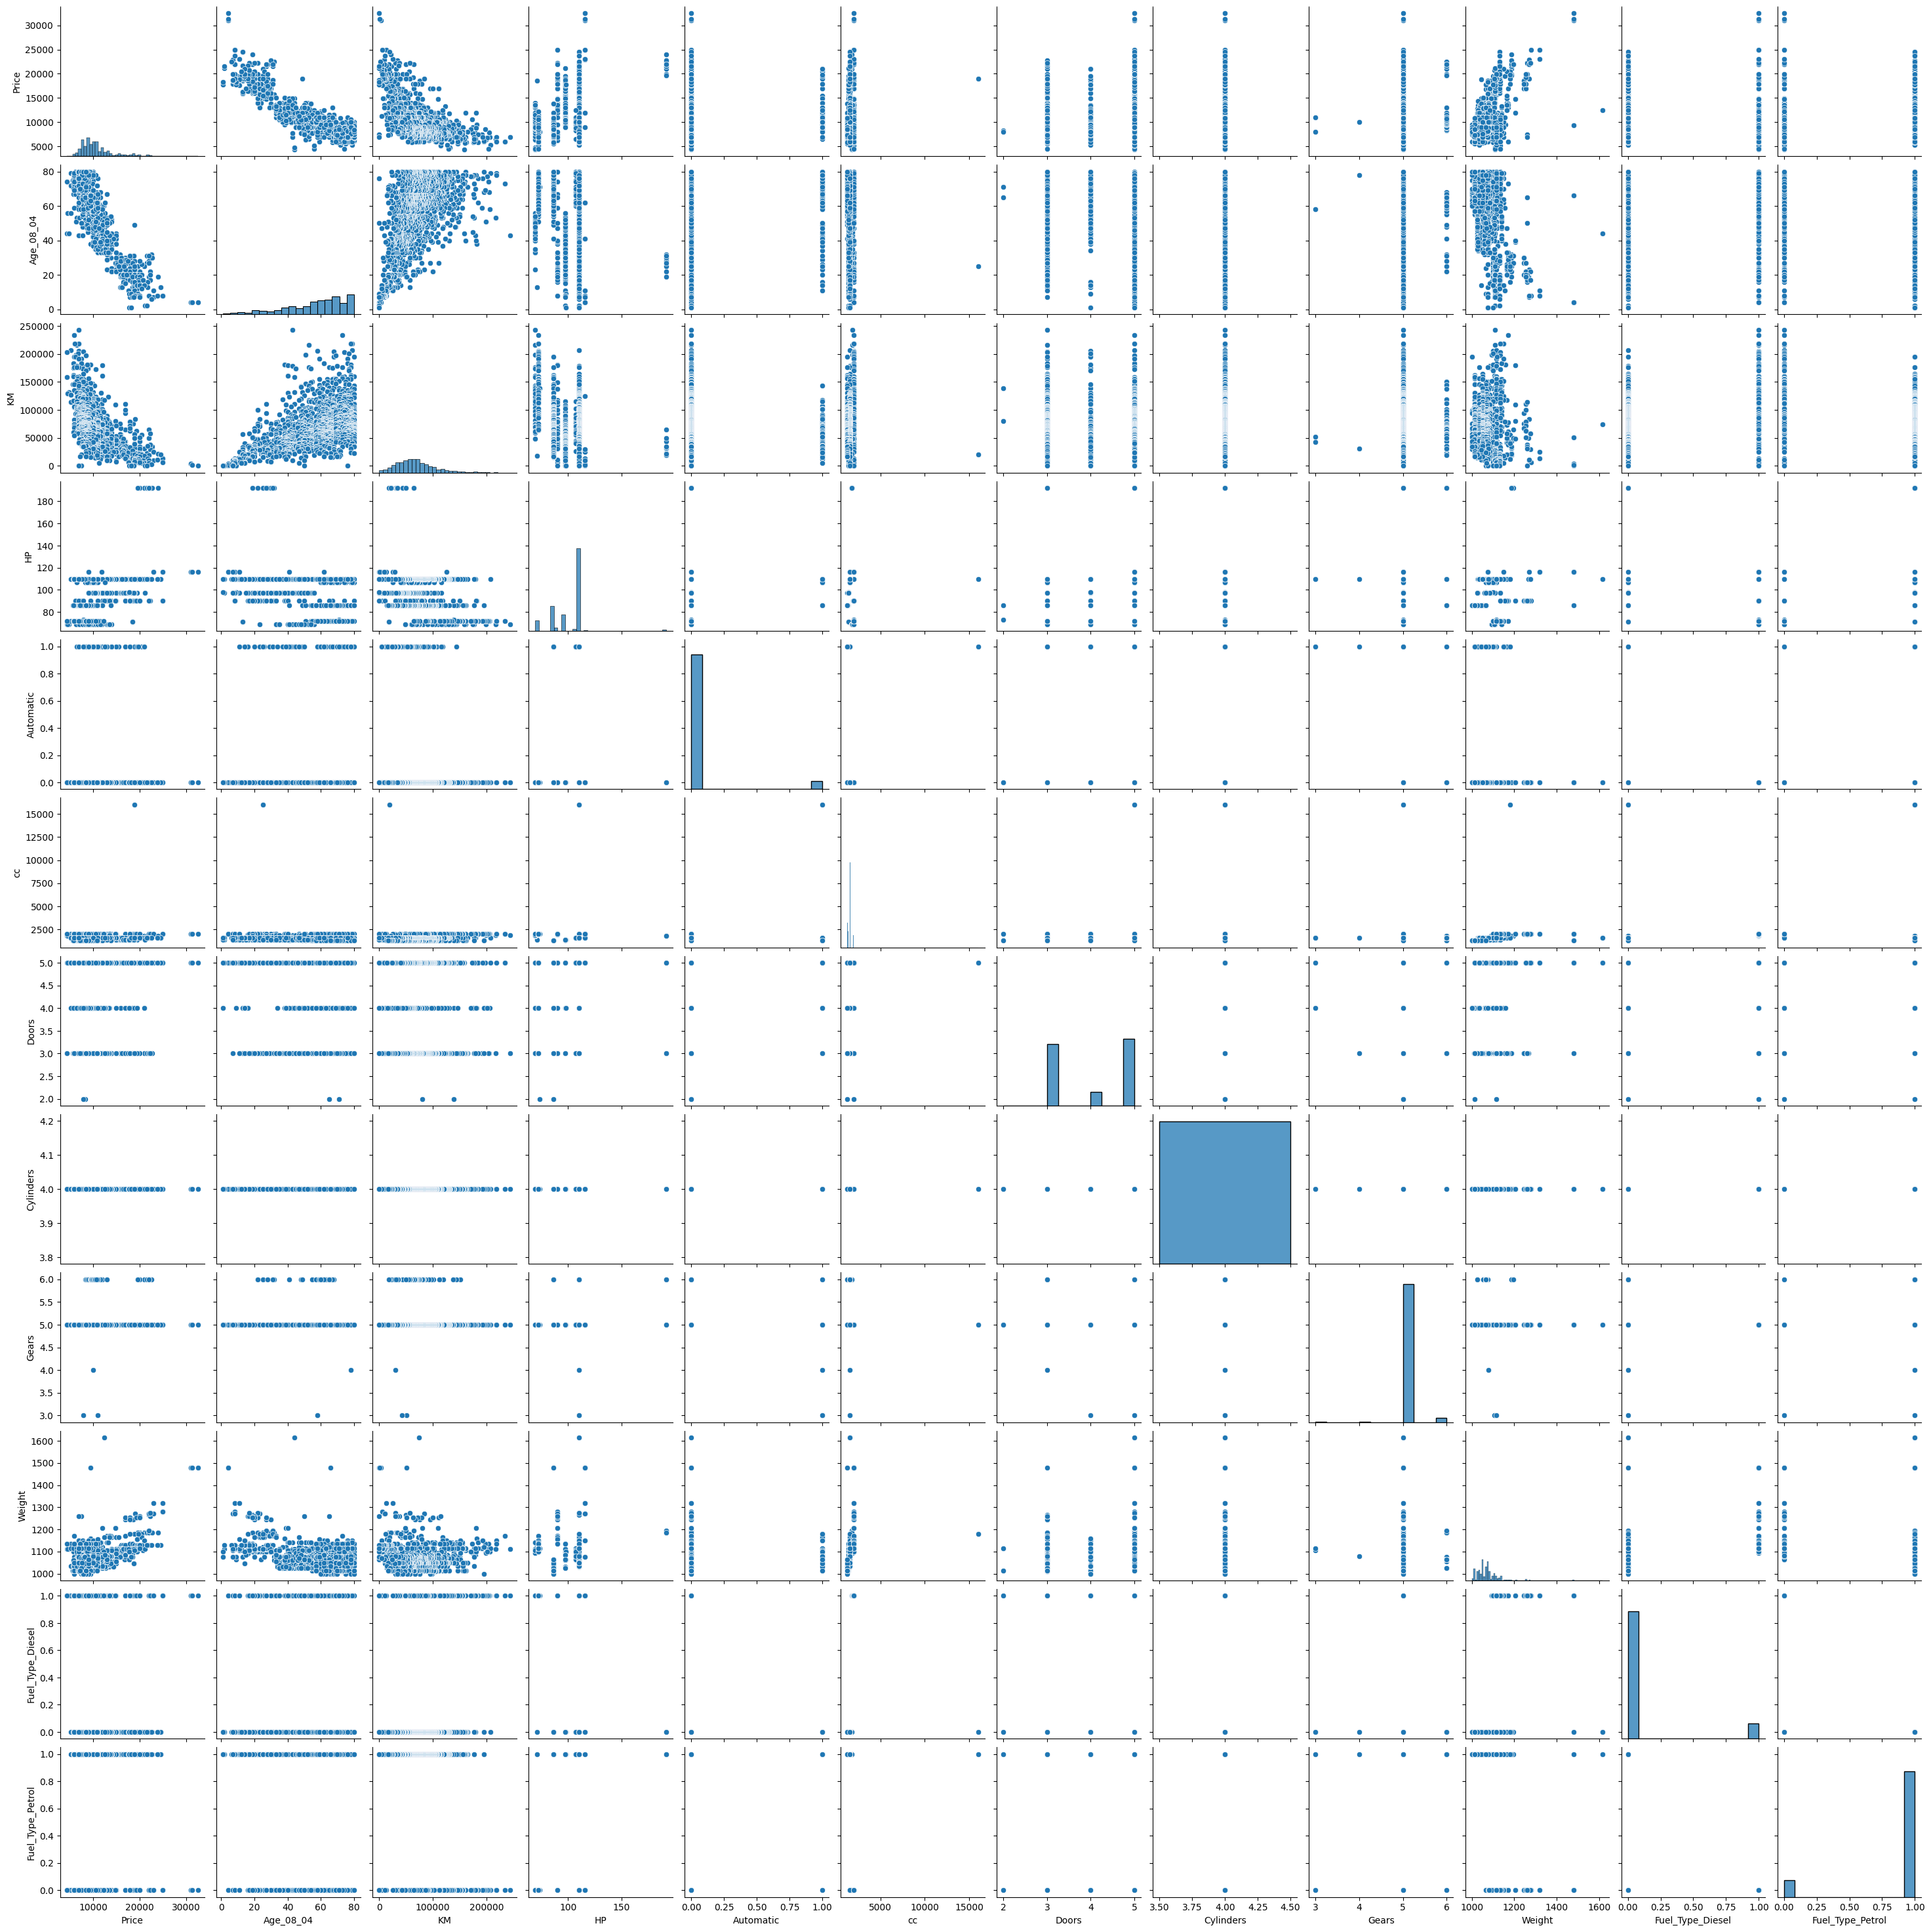

In [17]:
sns.pairplot(df)

**TASK:2
Split the dataset into training and testing sets (e.g., 80% training, 20% testing).**

In [18]:
X=df.drop('Price',axis=1)
y=df['Price']

In [19]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [20]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1148, 11)
(287, 11)
(1148,)
(287,)


**TASK:3
Build a multiple linear regression model using the training dataset. Interpret the coefficients of the model. Build minimum of 3 different models.**

In [35]:
model_1=LinearRegression()
model_1.fit(x_train,y_train)

LinearRegression()

In [36]:
print('Intercept',model_1.intercept_)
print('Slope',model_1.coef_)

Intercept -14115.237225945843
Slope [-1.21229191e+02 -1.59971491e-02  1.60754378e+01  2.68822211e+02
 -4.71094877e-02 -8.80971638e+01  1.13686838e-13  4.55011874e+02
  2.63612017e+01 -3.89683843e+02  1.12893306e+03]


In [37]:
y_pred=model_1.predict(x_test)
model_1_mse=mean_squared_error(y_test,y_pred)
model_1_r2=r2_score(y_test,y_pred)


In [38]:
print("mse:",model_1_mse)
print("r2:",model_1_r2)

mse: 2155628.3561396236
r2: 0.8203213869961808


**Method2**

In [42]:
x=df.drop(['Price','HP','Doors','Gears','Cylinders','Fuel_Type_Diesel','Fuel_Type_Petrol','Automatic'],axis=1)
y=df[['Price']]

In [43]:

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [44]:

model_2=LinearRegression()

In [45]:

model_2.fit(x_train,y_train)

LinearRegression()

In [46]:
print('Intercept',model_2.intercept_)
print('Slope',model_2.coef_)

Intercept [-1707.74030894]
Slope [[-1.21314931e+02 -2.23256102e-02 -7.56191876e-01  2.04469114e+01]]


In [47]:
y_pred1=model_2.predict(x_test)
model_2_mse=mean_squared_error(y_test,y_pred1)
model_2_r2=r2_score(y_test,y_pred1)

**Method3**

In [49]:
features1=df.drop("Price",axis=1)
target1=df[["Price"]]

In [50]:
x_train,x_test,y_train,y_test=train_test_split(features1,target1,test_size=0.2,random_state=100)

In [51]:
lasso=Lasso(alpha=1)
lasso.fit(x_train,y_train)

Lasso(alpha=1)

In [52]:
print('Intercept',lasso.intercept_)
print('Slope',lasso.coef_)

Intercept [-8258.1996946]
Slope [-1.24432435e+02 -1.78455677e-02  2.71581993e+01  3.83560526e+02
 -3.57584053e-02  4.94848814e+00  0.00000000e+00  7.00140104e+02
  1.88590934e+01  4.31526517e+02  7.41181039e+02]


In [53]:
y_pred2=lasso.predict(x_test)
lasso_mse=mean_squared_error(y_test,y_pred2)
lasso_r2=r2_score(y_test,y_pred2)

In [54]:
print("mse:",lasso_mse)
print("r2:",lasso_r2)

mse: 1590391.5688775138
r2: 0.8667359385047597


**TASK 4:
Evaluate the performance of the model using appropriate evaluation metrics on the testing dataset**

In [55]:
model_metrics=pd.DataFrame({
    'MEAN SQUARED ERROR':[model_1_mse,model_2_mse,lasso_mse],
    'R2 VALUE':[model_1_r2,model_2_r2,lasso_r2]
},index=['Model 1','Model 2','Model 3'])

In [56]:
model_metrics

,MEAN SQUARED ERROR,R2 VALUE
Model 1,2.155628e+06,0.820321
Model 2,2.462218e+06,0.830803
Model 3,1.590392e+06,0.866736


**Task 5**

**Apply Lasso and Ridge methods on the model.**

**LASSO Method**

In [57]:
lasso=Lasso(alpha=1)
lasso.fit(x_train,y_train)

Lasso(alpha=1)

In [58]:
print('Intercept',lasso.intercept_)
print('Slope',lasso.coef_)

Intercept [-8258.1996946]
Slope [-1.24432435e+02 -1.78455677e-02  2.71581993e+01  3.83560526e+02
 -3.57584053e-02  4.94848814e+00  0.00000000e+00  7.00140104e+02
  1.88590934e+01  4.31526517e+02  7.41181039e+02]


In [59]:
y_pred2=lasso.predict(x_test)
lasso_mse=mean_squared_error(y_test,y_pred2)
lasso_r2=r2_score(y_test,y_pred2)

In [60]:
print("mse:",lasso_mse)
print("r2:",lasso_r2)

mse: 1590391.5688775138
r2: 0.8667359385047597


**RIDGE METHOD**

In [61]:
ridge = Ridge(alpha=1)

In [62]:
ridge.fit(x_train,y_train)

Ridge(alpha=1)

In [63]:
y_pred3=ridge.predict(x_test)
ridge_mse=mean_squared_error(y_test,y_pred3)
ridge_r2=r2_score(y_test,y_pred3)

In [64]:
print('Intercept',ridge.intercept_)
print('Slope',ridge.coef_)

Intercept [-8317.09728831]
Slope [-1.24472484e+02 -1.78363062e-02  2.74022327e+01  4.01740856e+02
 -3.85518118e-02  7.49447707e+00  0.00000000e+00  7.10618709e+02
  1.87727064e+01  5.20114600e+02  8.08637265e+02]


In [65]:
print("mse:",ridge_mse)
print("r2:",ridge_r2)


mse: 1591329.4722342277
r2: 0.866657348544242


**Interview Questions**

 1. Normalization & Standardization
 Normalization scales the features to a range between 0 and 1, whereas standardization scales the features so that they have mean 0 and standard deviation 1.
 Both techniques help in improving the performance and convergence of machine learning algorithms, especially those based on gradient descent.

 2. Techniques to address multicollinearity
- Remove one of the correlated variables.
 - Combine the correlated variables into a single feature.
 - Use dimensionality reduction techniques like Principal Component Analysis (PCA).
- Regularization techniques like Lasso and Ridge regression.

 Assumptions made during the analysis:
- The dataset is assumed to be representative of the population.
- There are no significant outliers in the dataset.
 - The relationship between the independent variables and the dependent variable is linear.

Implications of assumptions:
Violation of these assumptions may lead to biased estimates and incorrect inferences. It's important to validate these assumptions before interpreting the results.